<a href="https://colab.research.google.com/github/Dani-Arizmendi/AA_PRACTICA2_GRUPO_3/blob/main/Pr%C3%A1ctica_2%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos Keras y las librerías necesarias

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

print(tf.__version__)#

2.7.0


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#Cargamos el set de datos y lo analizamos

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)

train_images1 = train_images.astype('float32') / 255
test_images1 = test_images.astype('float32') / 255

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


print (train_images.shape)
print (train_labels.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


#Apartado 1, 2, 3, 4 y 5

## Modelo 1

In [ ]:
modelo1 = Sequential()
modelo1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo1.add(MaxPooling2D((2, 2)))

modelo1.add(Conv2D(64, (5, 5), activation='relu'))
modelo1.add(MaxPooling2D((2, 2)))

modelo1.add(Flatten())
modelo1.add(Dense(10, activation='softmax'))
modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

MODELO 1 INTERPRETACIÓN DEL SUMMARY()

> 


La primera capa es de tipo convolucional con un tensor 2D. Devuelve 32 matrices o filtros  de 24x24 que son 32 capas ocultas obteniendo 832 parámetros.
El pooling que está a continuación hace una simplificación de la información obtenida y crea una versión condensada de la misma
Hacemos max pooling a todas las capas, y como habíamos puesto que la ventana del pooling sea 2x2 reducimos el tamaño de las matrices a la mitad, obteniendo unas 12x12.
 Como después del pooling las matrices son 12x12 haciendo ventanas de 5x5 obtenemos matrices de 8x8 que son el resultado de aplicar la segunda capa convolucional, que en este caso tenía 64 filtros, es decir 64  capas ocultas, que dan lugar a 51264 filtros. Volvemos a aplicar el max pooling a esta segunda capa conv y con el mismo planteamiento que antes obtenemos  64 matrices 4x4.
Aplicamos la capa Flatten a la que le entra una matriz de 3 dimensiones (24,24,64) y lo que hace es reducirla a una sola dimensión de 1024 elementos.
Por último aplicamos una capa Dense a la que le metemos todos los datos de la flatten y una función de activación Softmax. El número de parámetros de esta capa es de 10250  (10x1024 +10)  con una salida de un vector de 10.


In [ ]:
modelo1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 57s 95ms/step - loss: 0.8202 - accuracy: 0.8076
Epoch 2/5
600/600 [==============================] - 57s 95ms/step - loss: 0.2507 - accuracy: 0.9271
Epoch 3/5
600/600 [==============================] - 57s 95ms/step - loss: 0.1832 - accuracy: 0.9468
Epoch 4/5
600/600 [==============================] - 56s 93ms/step - loss: 0.1473 - accuracy: 0.9577
Epoch 5/5
600/600 [==============================] - 57s 95ms/step - loss: 0.1254 - accuracy: 0.9644


In [ ]:
test_loss, test_acc = modelo1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.1028 - accuracy: 0.9707
Test accuracy: 0.9707000255584717


## Modelo 1 con 25 épocas

In [ ]:
modelo1b = Sequential()
modelo1b.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelo1b.add(MaxPooling2D((2, 2)))

modelo1b.add(Conv2D(64, (5, 5), activation='relu'))
modelo1b.add(MaxPooling2D((2, 2)))

modelo1b.add(Flatten())
modelo1b.add(Dense(10, activation='softmax'))
modelo1b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
modelo1b.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo1b.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1699 - accuracy: 0.9526
Epoch 2/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1508 - accuracy: 0.9579
Epoch 3/5
600/600 [==============================] - 53s 88ms/step - loss: 0.1363 - accuracy: 0.9618
Epoch 4/5
600/600 [==============================] - 54s 90ms/step - loss: 0.1248 - accuracy: 0.9653
Epoch 5/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1157 - accuracy: 0.9676


In [ ]:
test_loss, test_acc = modelo1b.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0998 - accuracy: 0.9723
Test accuracy: 0.9722999930381775


AUMENTAR LOS ENTRENAMIENTOS

Con 5 entrenos obtenemos una precisión de 0.9670000076293945, un valor muy alto para las pocas épocas que realizamos.
Como es de esperar, al aumentar las épocas aumenta la precisión a casi el 99%


## Modelo 1 con función tanh

In [ ]:
modelo1c = Sequential()
modelo1c.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
modelo1c.add(MaxPooling2D((2, 2)))

modelo1c.add(Conv2D(64, (5, 5), activation='tanh'))
modelo1c.add(MaxPooling2D((2, 2)))

modelo1c.add(Flatten())
modelo1c.add(Dense(10, activation='softmax'))
modelo1c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
modelo1c.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo1c.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1699 - accuracy: 0.9526
Epoch 2/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1508 - accuracy: 0.9579
Epoch 3/5
600/600 [==============================] - 53s 88ms/step - loss: 0.1363 - accuracy: 0.9618
Epoch 4/5
600/600 [==============================] - 54s 90ms/step - loss: 0.1248 - accuracy: 0.9653
Epoch 5/5
600/600 [==============================] - 52s 87ms/step - loss: 0.1157 - accuracy: 0.9676


In [ ]:
test_loss, test_acc = modelo1c.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0998 - accuracy: 0.9723
Test accuracy: 0.9722999930381775


Si cambiamos el modelo 1 y le ponemos la funcion de activacion tanh en vez de ReLu a las capas convolucionales, con 5 épocas obtenemos una precisión de entrenamiento del 0.9722999930381775, que es ligeramente superior a la obtenida con ReLu con 5 entrenamientos.



## Modelo 2


In [ ]:
from keras.layers import Dropout
modelo2 = Sequential()
modelo2.add(Conv2D(64, (7, 7), padding = "same", activation='relu', input_shape=(28, 28, 1)))
modelo2.add(MaxPooling2D((2, 2)))

modelo2.add(Conv2D(128, (3, 3), padding = "same", activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))

modelo2.add(Flatten())
modelo2.add(Dense(65, activation='relu'))
modelo2.add(Dropout(0.5)
modelo2.add(Dense(1, activation='softmax'))
modelo2.summary()

MODELO 2 INTERPRETACIÓN DEL SUMMARY()

La primera capa es de tipo convolucional con un tensor 2D.En teoría, tomaría ventanas 7x7 por lo que devolvería matrices de tamaño 22x22 (28-7+1). Sin embargo, al haber puesto ’padding’=same la salida devuelve  64 matrices o filtros de 28x28 que son 64 capas ocultas obteniendo 3200 parámetros, ya que esta función mete ceros en los extremos para compensar las posiciones restantes.
El pooling que está a continuación hace una simplificación de la información obtenida y crea una versión condensada de la misma.
Hacemos max pooling a todas las capas, y como habíamos puesto que la ventana del pooling sea 2x2 reducimos el tamaño de las matrices a la mitad, obteniendo unas 14x14.
Volvemos a aplicar la segunda capa convolucional y por el mismo motivo que antes mantenemos el tamaño de las matrices, pero en este caso saca 128 filtros/ capas ocultas.
Después de cada capa convolucional debemos aplicar el pooling, que al tener ventanas 2x2 reduce el tamaño de las matrices a 7x7 y mantiene el número de filtros.
Aplicamos la capa Flatten a la que le entra una matriz de 3 dimensiones y la reduce a una sola dimensión con 6272 elementos.
El siguiente paso es aplicar una capa Dense a la que le metemos todos los datos de la flatten, una función de activación Relu, y 65 elementos, lo que hace un total de  407745 parámetros ( 6272x65+65)
Por último aplicamos una segunda capa dense en este caso con Función de activación softmax y 10 elementos y obtenemos una salida de 660 parámetros (65x10+10)


In [ ]:
modelo2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
modelo2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 183s 305ms/step - loss: 0.9571 - accuracy: 0.7334
Epoch 2/5
600/600 [==============================] - 176s 293ms/step - loss: 0.2749 - accuracy: 0.9191
Epoch 3/5
600/600 [==============================] - 175s 292ms/step - loss: 0.1876 - accuracy: 0.9450
Epoch 4/5
600/600 [==============================] - 175s 291ms/step - loss: 0.1430 - accuracy: 0.9579
Epoch 5/5
600/600 [==============================] - 176s 294ms/step - loss: 0.1159 - accuracy: 0.9661


In [ ]:
test_loss, test_acc = modelo2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 9s 27ms/step - loss: 0.0963 - accuracy: 0.9718
Test accuracy: 0.9718000292778015


## Modelo 3


In [ ]:
modelo3 = Sequential()
modelo3.add(Conv2D(64, (7, 7), padding = "same", activation='relu', input_shape=(28, 28, 1)))
modelo3.add(MaxPooling2D((2, 2)))

modelo3.add(Conv2D(128, (3, 3), padding = "same", activation='relu'))
modelo3.add(MaxPooling2D((2, 2)))

modelo3.add(Flatten())
modelo3.add(Dense(65, activation='relu'))
modelo3.add(Dense(10, activation='softmax'))
modelo3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

MODELO 3 INTERPRETACIÓN DEL SUMMARY()

La primera capa es de tipo convolucional. En teoría, tomaría ventanas 7x7 por lo que devolvería matrices de tamaño 22x22 (28-7+1). Sin embargo, al haber puesto ’padding’=same la salida devuelve  64 matrices o filtros de 28x28 que son 64 capas ocultas obteniendo 3200 parámetros, ya que esta función mete ceros en los extremos para compensar las posiciones restantes.
El pooling que está a continuación hace una simplificación de la información obtenida y crea una versión condensada de la misma.
Hacemos max pooling a todas las capas, y como habíamos puesto que la ventana del pooling sea 2x2 reducimos el tamaño de las matrices a la mitad, obteniendo unas 14x14.
Volvemos a aplicar una capa convolucional y como por el padding no reduce el tamaño sacamos 128 filtros de 14x14 y 73856  parámetros. Vovemos a aplicar el pooling y obtenemos los mismos filtros pero de dimensión 7x7 por lo explicado anteriormente.
Aplicamos la capa Flatten a la que le entra una matriz de 3 dImensiones y la reduce a una sola dimensión con 6272 elementos.
Después aplicamos la primera capa dense a la que le metemos todos los datos de la flatten, una función de activación Relu, y 65 elementos, lo que hace un total de  407745 parámetros ( 6272x65+65)
Por último aplicamos una segunda capa dense en este caso con Función de activación softmax y 10 elementos y obtenemos una salida de 660 parámetros (65x10+10)


In [ ]:
modelo3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
modelo3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
  8/600 [..............................] - ETA: 3:08 - loss: 2.1227 - accuracy: 0.3075

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = modelo3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

# Apartado 6   

 Primero comprobamos a que corresponde la 6º imagen de test




In [ ]:
tipo_de_prenda = test_labels[5]
class_names[tipo_de_prenda]

# 'Trouser'

Ahora usamos cada modelo para que nos muestre su predicción




### Modelo 1


In [ ]:

predicciones1 = modelo1.predict(test_images1)
prediccion_prenda = np.argmax(predicciones1[5])
class_names[prediccion_prenda]


# 'Trouser'

'Trouser'

#### Conclusiones Modelo 1
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Trouser' . Este resultado tiene sentido puesto que el modelo 1 tiene una precisión del 97,07%

### Modelo 2

In [ ]:
predicciones2 = modelo2.predict(test_images)
prediccion_prenda = np.argmax(predicciones2[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

#### Conclusiones Modelo 2
El modelo predice que la sexta imagen pertenece al tipo 'Trouser'. Este resultado tiene sentido ya que nuestro modelo tiene una precisión del 0%

### Modelo 3

In [ ]:
predicciones3 = modelo3.predict(test_images)
prediccion_prenda = np.argmax(predicciones3[5])
class_names[prediccion_prenda]

# 'Trouser'

'Trouser'

#### Conclusiones Modelo 3
Como podemos observar el modelo predice que la sexta prenda es de tipo 'Pantalones' y se ajusta a la realidad, debido a la precisión del modelo que llega al %

#Apartado 7. Graficar modelos

##Modelo 1

In [ ]:
def plot_image(i, predicciones1, true_label, img):
  predicciones1, true_label, img = predicciones1, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones1)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones1),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones1, true_label):
  predicciones1, true_label = predicciones1, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones1, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones1)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

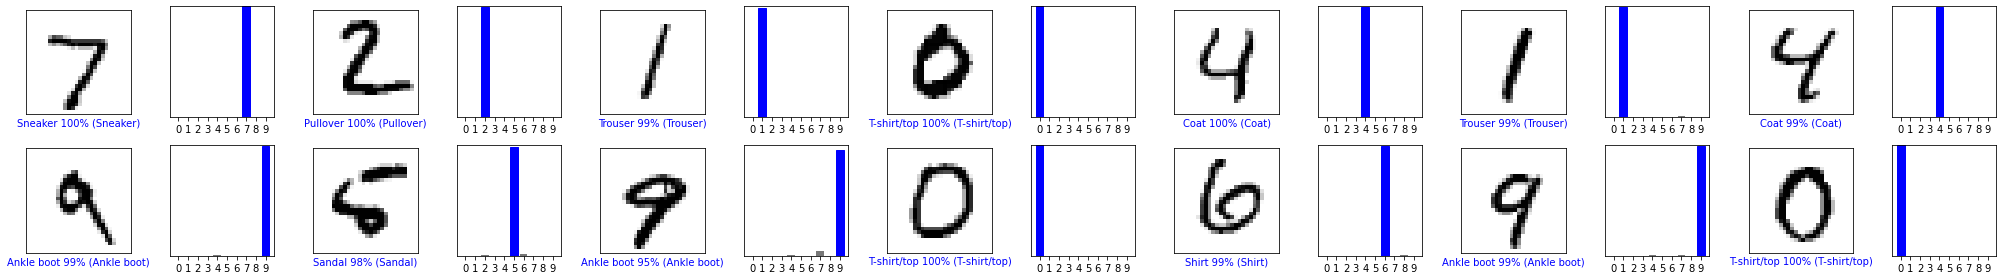

In [ ]:

filas = 2
cols = 7
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones1[i], test_labels, test_images1)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones1[i], test_labels)
plt.tight_layout()
plt.show()

El modelo 1 tiene una precisión de 79,18%. En este caso entre las 10 primeras imágenes acierta 9 de 10 lo que resulta en una mejoría respecto al  resultado esperado, si analizasemos más imágenes la tendencia se acercaría hacia la precisión del modelo.

##Modelo 2

In [ ]:
def plot_image(i, predicciones2, true_label, img):
  predicciones2, true_label, img = predicciones2, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones2)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones2),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones2, true_label):
  predicciones2, true_label = predicciones2, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones2, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones2)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

NameError: ignored

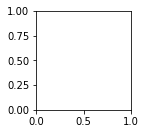

In [ ]:
filas = 2
cols = 7
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones2[i], test_labels, test_images1)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones2[i], test_labels)
plt.tight_layout()
plt.show()

El modelo 2 tiene una precisión de 83,6% pero en este caso acierta las 10 primeras imágenes y con un porcentaje bastante alto por lo que podemos deducir que esta muestra no se adecua a la precisión del modelo.

##Modelo 3

In [ ]:
def plot_image(i, predicciones3, true_label, img):
  predicciones3, true_label, img = predicciones3, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predicciones3)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predicciones3),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predicciones3, true_label):
  predicciones3, true_label = predicciones3, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predicciones3, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predicciones3)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
filas = 2
cols = 7
num_images = filas*cols
plt.figure(figsize=(2*2*cols, 2*filas))
for i in range(num_images):
  plt.subplot(filas, 2*cols, 2*i+1)
  plot_image(i, predicciones3[i], test_labels, test_images)
  plt.subplot(filas, 2*cols, 2*i+2)
  plot_value_array(i, predicciones3[i], test_labels)
plt.tight_layout()
plt.show()

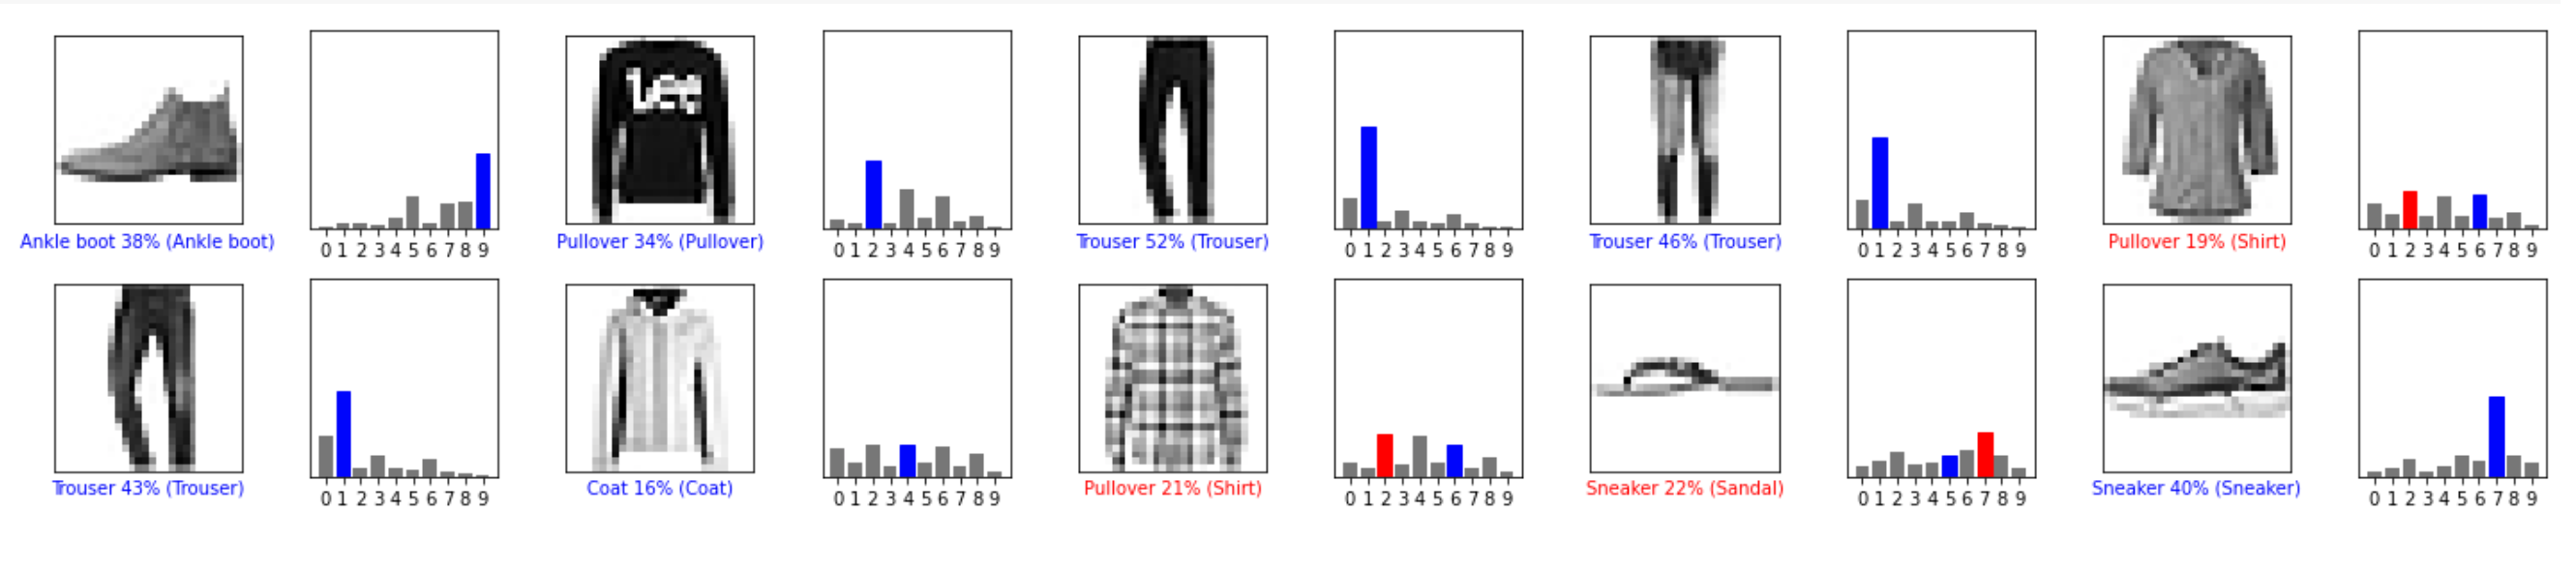

El modelo 3 tiene una precisión de 63,73% y la gráfica muestra como acierta en 7 de 10 casos aunque muchos de los aciertos son con porcentajes muy bajos lo que implica que no tiene mucha fiabilidad. 

#Apartado 8


El mejor modelo de la primera práctica era el modelo 6 con el que obteníamos una precisión de test de 87,90 %. Con el mismo set de datos, y la misma tarea de clasificar imágenes de ropa en función de la clase a la que pertenece pero creando un Red Convolucional obtenemos una mayor precisión en el mejor modelo (modelo número # ). Y no solo eso sino que además todos los modelos tienen una precisión superior al 95%, valor que es muy superior a cualquiera de la Red neuronal anterior.
Debido a este hecho, demostramos que la incorporación de capas convolucionales hacen que las Redes Neuronales sean más convenientes a la hora de realizar tareas de reconocimiento de imágenes. 
